In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('datasets/diabetes_prediction_dataset.csv')

In [4]:
df.shape

(100000, 9)

In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
df.describe(include = 'all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

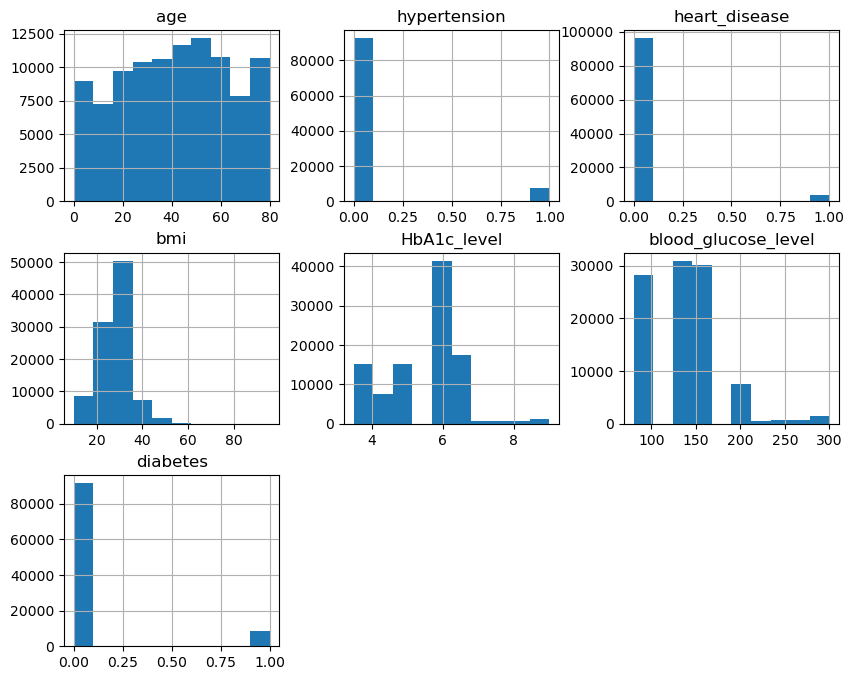

In [9]:
df.hist(figsize=(10,8))

In [10]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [20]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [21]:
dummies = pd.get_dummies(df['smoking_history'])
dummies

,current,ever,former,never,not current
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
99995,0,0,0,0,0
99996,0,0,0,0,0
99997,0,0,1,0,0
99998,0,0,0,1,0


In [22]:
df1 = pd.concat([df.drop(['smoking_history'], axis='columns'), dummies], axis='columns')

In [23]:
df1.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,current,ever,former,never,not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,1,0,0,0,0


In [24]:
x = df1.drop(['diabetes'], axis='columns')
y = df1['diabetes']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [35]:
y_pred =0
def regressor(model):
    model.fit(x_train, y_train)
    scores = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(scores)

In [36]:
regressor(LogisticRegression())

0.95668


C:\Users\Nunoo Justice Samuel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
regressor(RandomForestClassifier())

0.96848


In [29]:
regressor(DecisionTreeClassifier())

0.95092


In [30]:
rfr_model = RandomForestClassifier(criterion='gini',max_features='log2')
rfr_model.fit(x_train, y_train)

RandomForestClassifier(max_features='log2')

In [33]:
rfr_model.score(x_test, y_test)

0.96896

In [42]:
df1.corr()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,current,ever,former,never,not current
gender,1.000000,-0.030656,0.014203,0.077696,-0.022994,0.019957,0.017199,0.037411,0.026379,0.011039,0.048770,-0.098743,-0.010845
age,-0.030656,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008,0.030946,0.065768,0.216481,0.065498,0.067663
hypertension,0.014203,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823,0.017930,0.023124,0.083401,0.045953,0.000997
heart_disease,0.077696,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727,0.007604,0.040671,0.095194,-0.030843,0.007922
bmi,-0.022994,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357,0.053617,0.044343,0.111312,0.086849,0.034979
HbA1c_level,0.019957,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660,0.006123,0.009655,0.037306,0.010684,0.009830
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558,0.012447,0.006267,0.040688,0.012475,0.008613
diabetes,0.037411,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000,0.019606,0.024080,0.097917,0.027267,0.020734
current,0.026379,0.030946,0.017930,0.007604,0.053617,0.006123,0.012447,0.019606,1.000000,-0.065343,-0.102766,-0.235267,-0.083990
ever,0.011039,0.065768,0.023124,0.040671,0.044343,0.009655,0.006267,0.024080,-0.065343,1.000000,-0.065598,-0.150177,-0.053613


In [39]:
y_pred = rfr_model.predict(x_test)

In [40]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22837
           1       0.96      0.67      0.79      2163

    accuracy                           0.97     25000
   macro avg       0.97      0.83      0.89     25000
weighted avg       0.97      0.97      0.97     25000



In [ ]:
y_pred = rfr_model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
cm

In [ ]:
def find_best_model(x, y):
    algos = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'penalty': ['l1', 'l2', 'elasticnet', None],
                'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ["gini", "entropy", "log_loss"],
                'splitter': ['best', 'random'],
                'max_features' : ["auto", "sqrt", "log2"]
            }
        },
        'Random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion': ["gini", "entropy", "log_loss"],
                'n_estimators' : [10, 20, 50, 100],
                'max_features' : ["sqrt", "log2", None]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algoname, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algoname,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(x_train, y_train)

In [ ]:
corr_matrix = df1.corr()
corr_matrix["diabetes"].sort_values(ascending=False)

In [ ]:
df1 = pd.get_dummies(df)
df1[df1['diabetes']==1]

In [ ]:
df1[df1['gender_Other'] ==1].count()

In [ ]:
df1.columns

In [ ]:
def classify_diabetes(age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, gender, smoking_history):
    gender_index = np.where(x.columns==gender)[0][0]
    smoking_history_index = np.where(x.columns==smoking_history)[0][0]
    
    var = np.zeros(len(x.columns))
    var[0] = age
    var[1] = hypertension
    var[2] = heart_disease
    var[3] = bmi
    var[4] = HbA1c_level
    var[5] = blood_glucose_level
    
    if gender_index >= 0 and smoking_history_index >= 0:
        var[gender_index] = 1
        var[smoking_history_index] = 1
    print(var)
    return rfr_model.predict([var])[0]

In [ ]:
classify_diabetes(44, 0, 0, 19.32, 6.5, 200, 'gender_Female', 'smoking_history_never')

In [ ]:
import pickle
with open('diabetes_classifier.pickle', 'wb') as f:
    pickle.dump(rfr_model, f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open('diabetes_classifier_columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [ ]:
col = ''
with open('diabetes_classifier_columns.json', 'r') as f:
    col = json.load(f)['data_columns']

In [ ]:
for i in col[9:]:
    print(i)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# Here we visualize the error
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')